<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [26]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [27]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [28]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [29]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [30]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:ylabel='MEDV'>

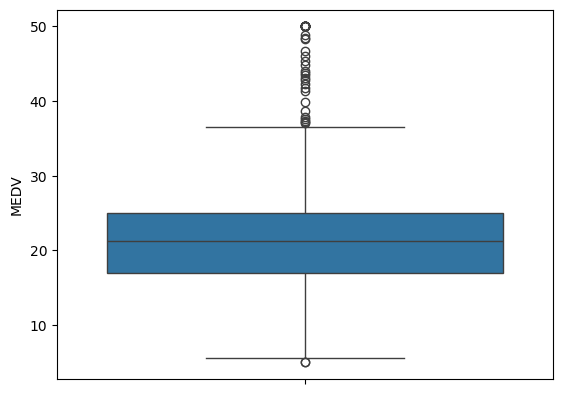

In [31]:
sns.boxplot(boston_df.MEDV)

<AxesSubplot:>

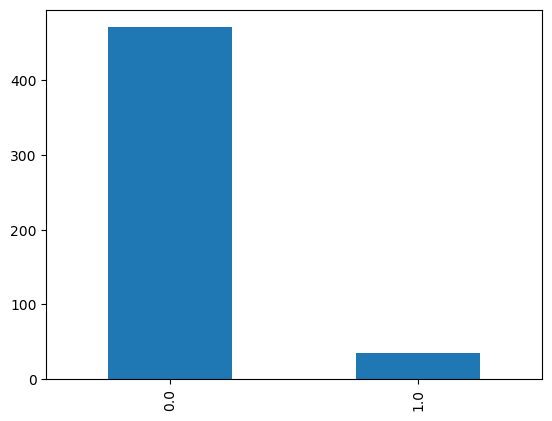

In [32]:
boston_df['CHAS'].value_counts().plot(kind='bar')

<ipython-input-33-38cc6296ae6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.boxplot(data=boston_df, x='Age_group',y='MEDV', palette='dark', order=['Age_35_or_younger','Age_35-70', 'Age_70+'])


Text(0.5, 1.0, 'Age group distribution')

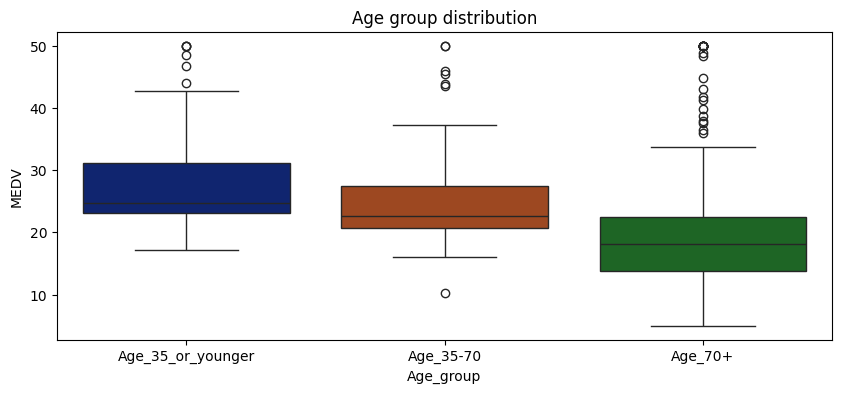

In [33]:
boston_df.loc[boston_df['AGE']<=35,'Age_group']='Age_35_or_younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'Age_group']='Age_35-70'
boston_df.loc[boston_df['AGE']>70,'Age_group']='Age_70+'

pyplot.figure(figsize=(10,4))
g=sns.boxplot(data=boston_df, x='Age_group',y='MEDV', palette='dark', order=['Age_35_or_younger','Age_35-70', 'Age_70+'])
pyplot.title('Age group distribution')

Text(0.5, 1.0, 'NOX versus INDUS')

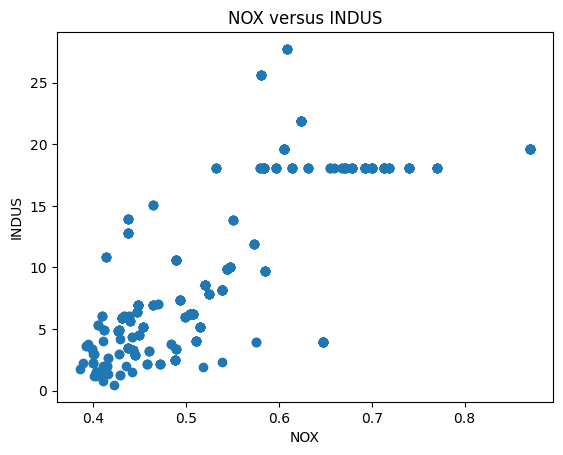

In [34]:
pyplot.scatter(x=boston_df.NOX, y=boston_df.INDUS)
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')
pyplot.title('NOX versus INDUS')

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

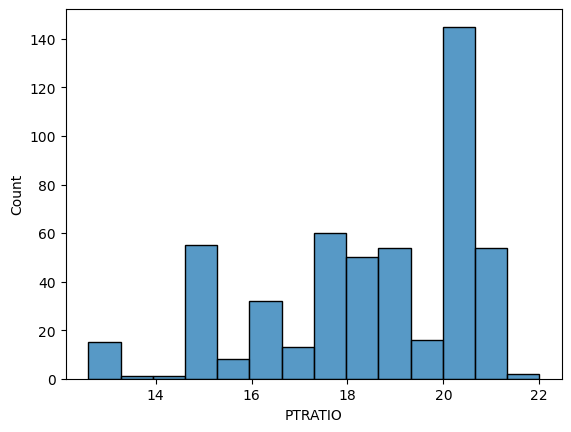

In [35]:
sns.histplot(boston_df.PTRATIO)

<h1>Test the Hypothesis</h1>

<h1>Question 1</h1>
<p>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</p>
State the Hypothesis:
<p>H0: CHAS = MEDV</p>
<p>H1: CHAS != MEDV</p>

In [36]:
score,pValue = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
equal_var = True if pValue>0.05 else False 
equal_var

False

In [37]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = equal_var)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on houses near Charles River (dummy variable)

<h1>Question 2</h1>
<p>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</p>
<p>State the hypothesis:</p>
<p>H0: MEDV = AGE</p>
<p>H1: MEDV != AGE</p>

In [38]:
#Is there a difference in Median values of houses (MEDV) 
#for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
scipy.stats.levene(boston_df[boston_df['Age_group'] == 'Age_35_or_younger']['MEDV'],
                   boston_df[boston_df['Age_group'] == 'Age_35-70']['MEDV'], 
                   boston_df[boston_df['Age_group'] == 'Age_70+']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [39]:
thirtyfive_or_low = boston_df[boston_df['Age_group'] == 'Age_35_or_younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_group'] == 'Age_35-70']['MEDV']
seventy_older = boston_df[boston_df['Age_group'] == 'Age_70+']['MEDV']

In [40]:
#Run the ANOVA code
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_or_low, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the P-value is less than the alpha (=0.05), so we reject the null hypothesis as there is significant evidence that at least one of the means differ.

<h1>Question 3</h1>
<p>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) </p>re


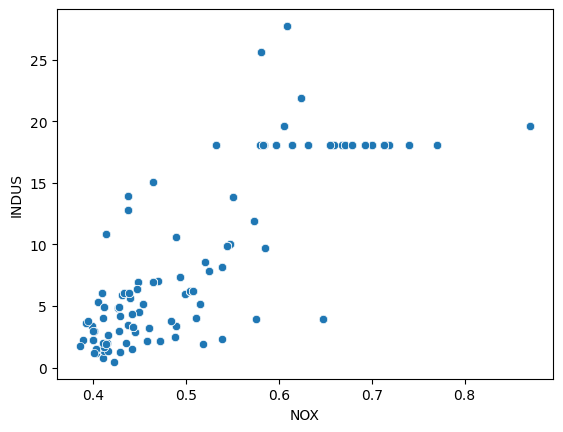

In [41]:
ax = sns.scatterplot(x='NOX',y='INDUS',data=boston_df)

In [42]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the p-Value (Sig. (2-tailed)) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

<h1>Question 4</h1>
<p>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</p>

In [43]:
cont_table  = pd.crosstab(boston_df['DIS'], boston_df['MEDV'])
cont_table

scipy.stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=93321.06797619049, pvalue=0.8141983412830176, dof=93708, expected_freq=array([[0.00395257, 0.00197628, 0.00197628, ..., 0.00197628, 0.00197628,
        0.03162055],
       [0.00395257, 0.00197628, 0.00197628, ..., 0.00197628, 0.00197628,
        0.03162055],
       [0.00395257, 0.00197628, 0.00197628, ..., 0.00197628, 0.00197628,
        0.03162055],
       ...,
       [0.00790514, 0.00395257, 0.00395257, ..., 0.00395257, 0.00395257,
        0.06324111],
       [0.00790514, 0.00395257, 0.00395257, ..., 0.00395257, 0.00395257,
        0.06324111],
       [0.00395257, 0.00197628, 0.00197628, ..., 0.00197628, 0.00197628,
        0.03162055]]))

Since the P-value is greater than 0.05, so we cannot reject the null hypothesis because there is not enough proof that there is a statistical difference in DIS based on MEDV.